In [66]:
from __future__ import absolute_import, division, print_function

import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from shutil import copyfile
import xml.etree.ElementTree as ET
import IPython.display as display
import random
import pathlib
import cv2
import tensorflow as tf
from array import *
from PIL import Image
import uuid

In [67]:
base_path = 'dataset_project'

In [68]:
DATADIR = 'E:\CMPE257\Project\dataset_project'
data_root = pathlib.Path(DATADIR)
for item in data_root.iterdir():
  print(item)

E:\CMPE257\Project\dataset_project\Annotation
E:\CMPE257\Project\dataset_project\Image
E:\CMPE257\Project\dataset_project\test.csv
E:\CMPE257\Project\dataset_project\train.csv


In [69]:
all_image_paths = list(data_root.glob('**/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]
# random.shuffle(all_image_paths)

all_xml_paths = list(data_root.glob('**/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]
# random.shuffle(all_xml_paths)

image_count = len(all_image_paths)
xml_count = len(all_xml_paths)
image_count + xml_count

424

In [70]:
all_image_paths[:10] + all_xml_paths[:10]

['E:\\CMPE257\\Project\\dataset_project\\Image\\100n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\101n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\102n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\103n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\104n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\105n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\106n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\107n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\108n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Image\\109n.jpg',
 'E:\\CMPE257\\Project\\dataset_project\\Annotation\\100n.xml',
 'E:\\CMPE257\\Project\\dataset_project\\Annotation\\101n.xml',
 'E:\\CMPE257\\Project\\dataset_project\\Annotation\\102n.xml',
 'E:\\CMPE257\\Project\\dataset_project\\Annotation\\103n.xml',
 'E:\\CMPE257\\Project\\dataset_project\\Annotation\\104n.xml',
 'E:\\CMPE257\\Project\\dataset_project\\Annotation\\105n.xml',
 'E:\\CMPE257\\Project\\da

In [71]:
def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel

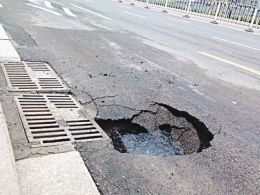

Image\220p.jpg


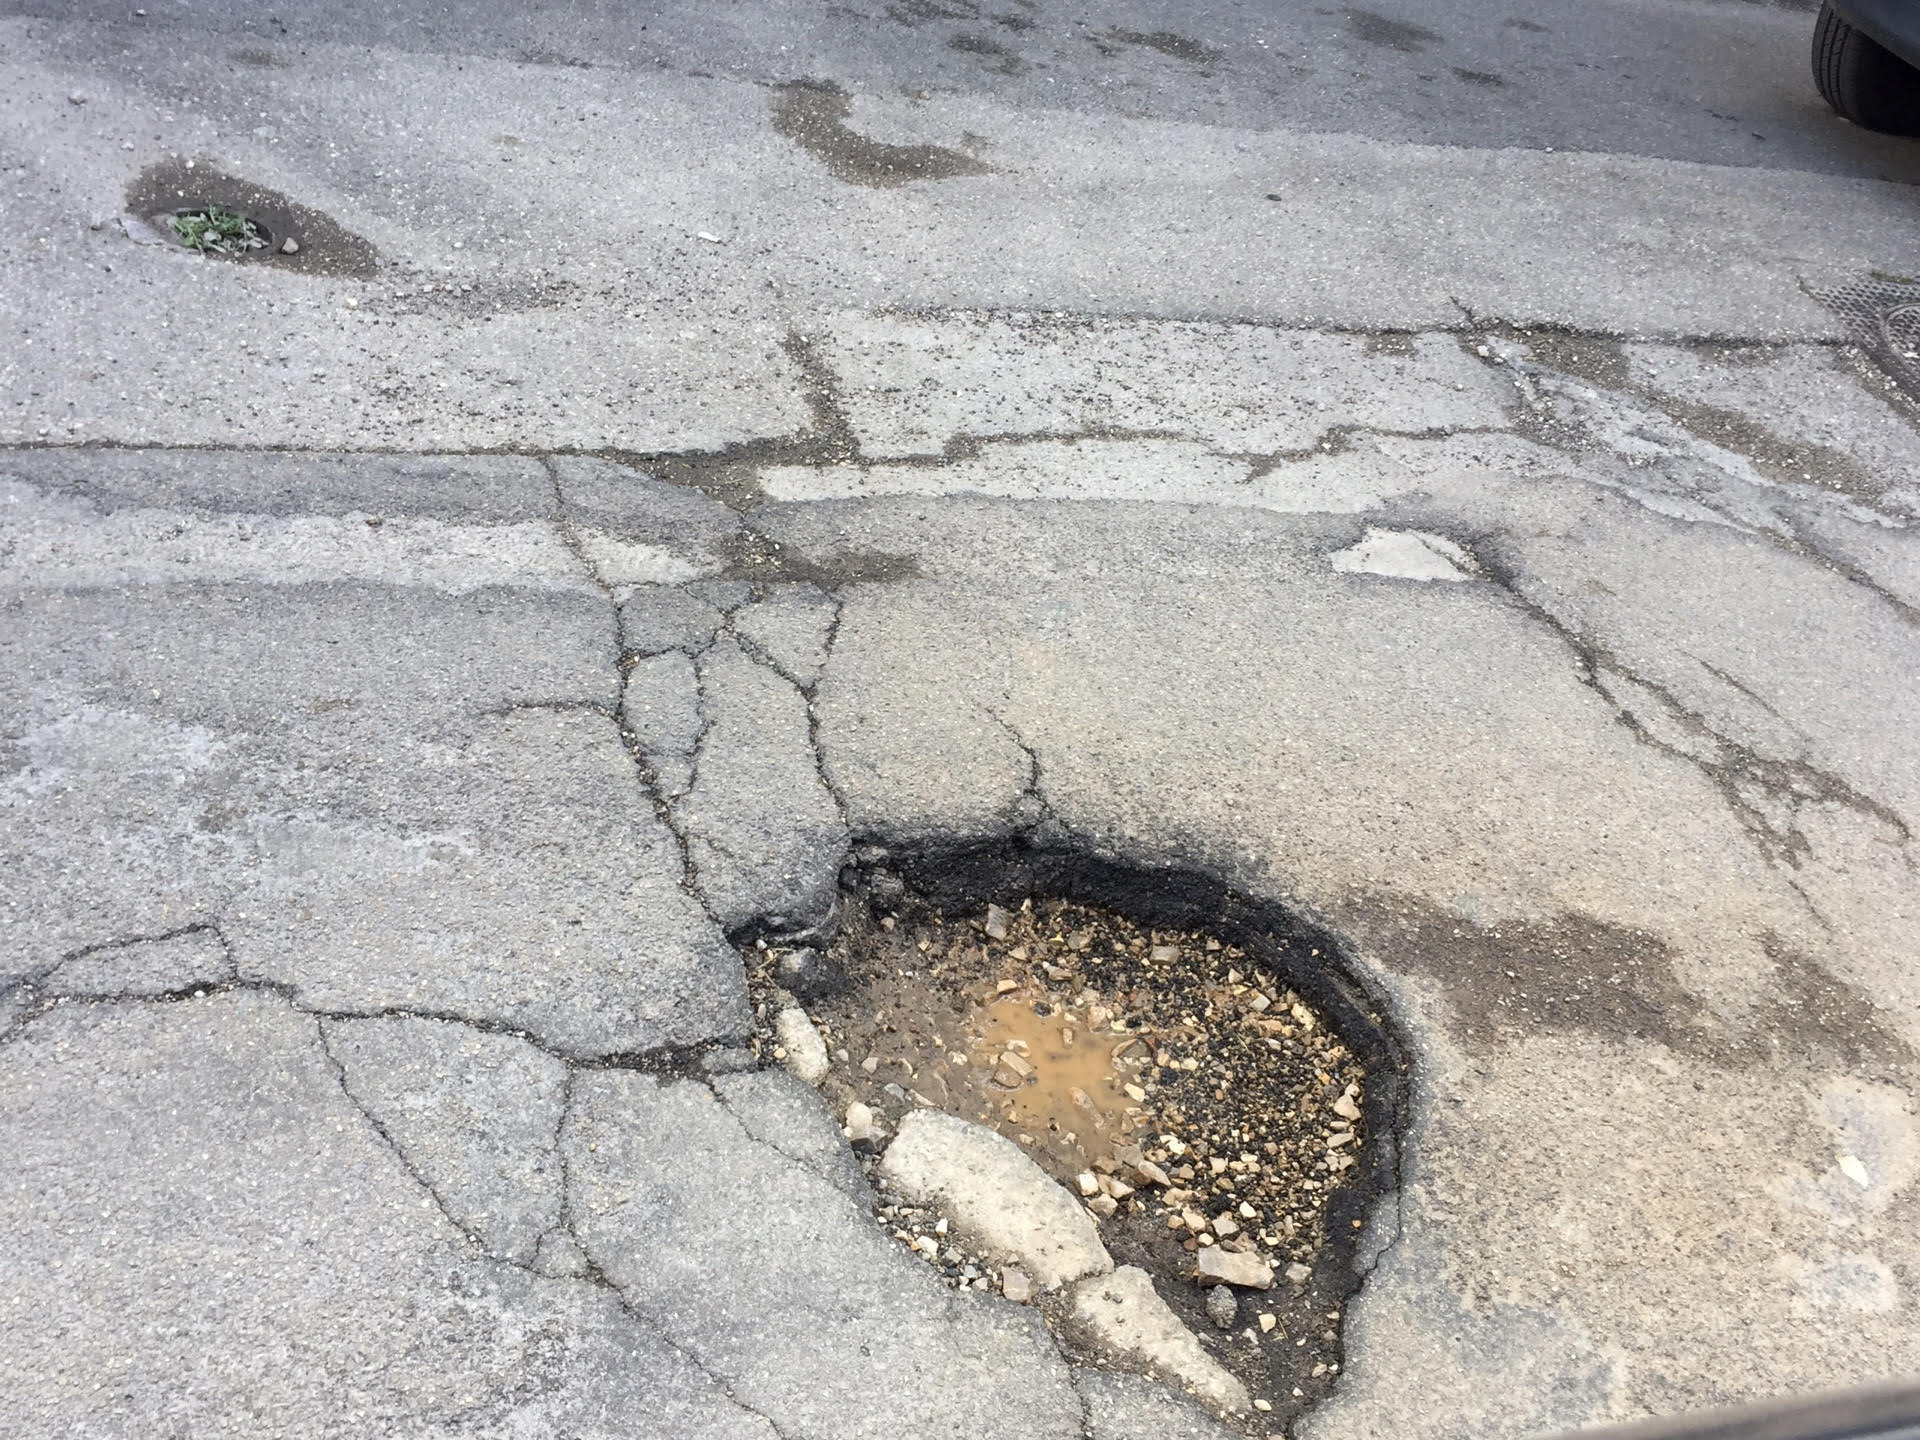

Image\309p.jpg


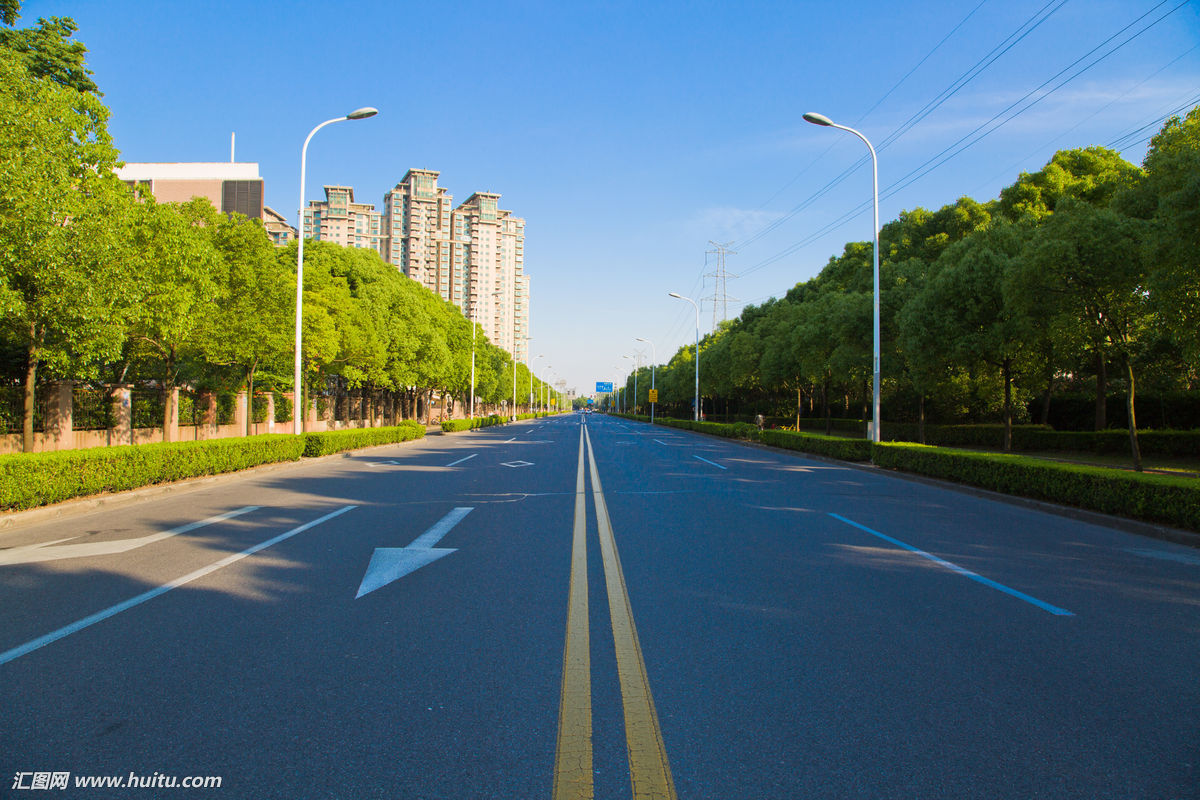

Image\100n.jpg


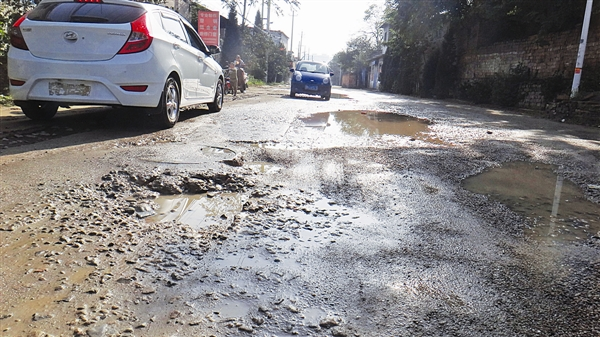

Image\231p.jpg


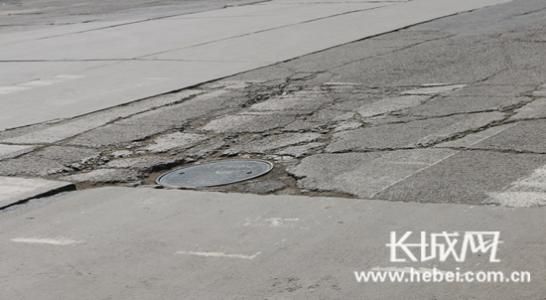

Image\214p.jpg


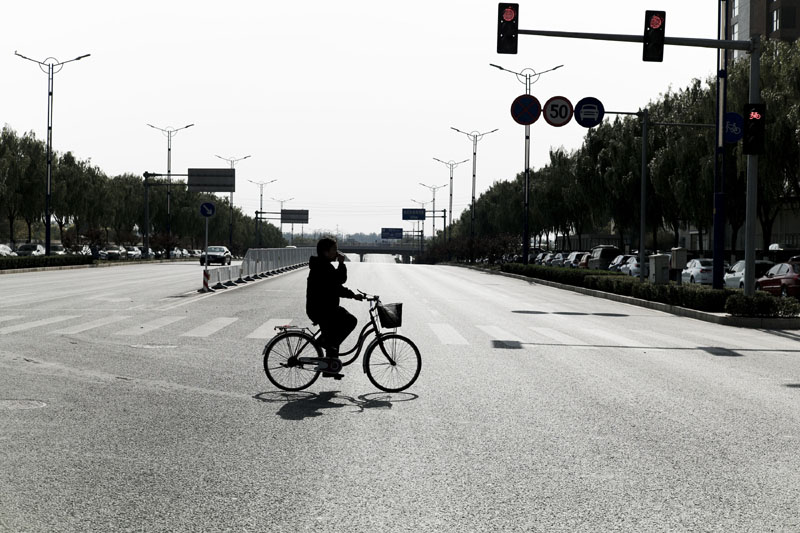

Image\111n.jpg


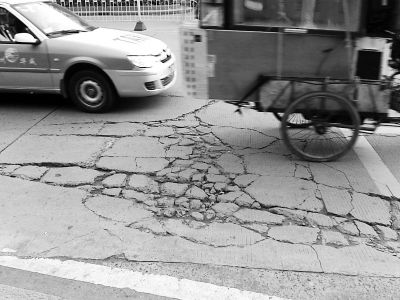

Image\278p.jpg


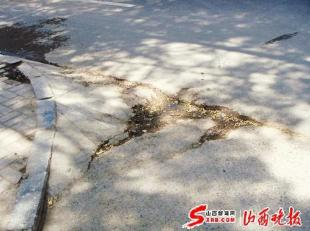

Image\324p.jpg


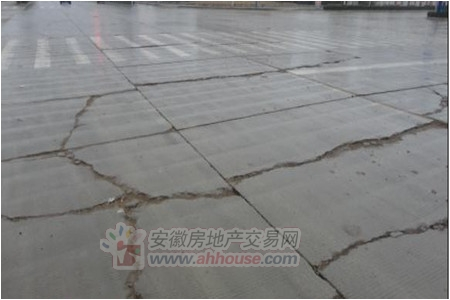

Image\213p.jpg


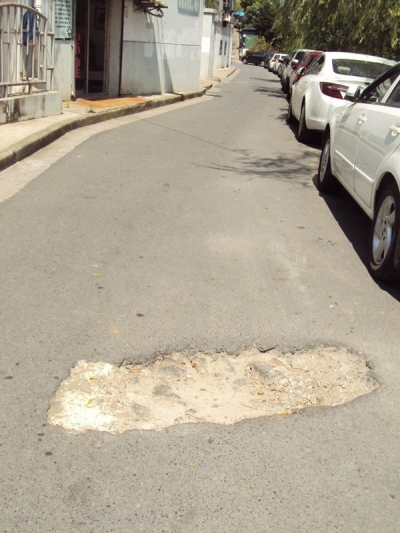

Image\253p.jpg


In [72]:
for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))

In [73]:
df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])
def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    url = 'E:/CMPE257/Project/dataset_project/Image/' + root.find("./filename").text

    x_list = []
    y_list = []
    i = 0
    for co in objs:
        print(co.find("./name").text)
        print(co.find("./attributes").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
#             print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        if co.find("./attributes").text is None:
            classname = str(co.find("./name").text)
        else:
            classname  = str(co.find("./name").text+co.find("./attributes").text)
        df = df.append({'FileName': root.find("./filename").text, 
                                            'XMin': min(x_list), 
                                            'XMax': max(x_list), 
                                            'YMin': min(y_list), 
                                            'YMax': max(y_list), 
                                            'ClassName': classname}, 
                                           ignore_index=True)
        print()
    
#         im = Image.open(url) 
#         outfile = '%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
#         im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).save(outfile)
#         print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []

filename : 100n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 800
ncols : 1200
object
name : paint
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:03:48
id : 0
polygon
username : anonymous
pt
x : 836
y : 508
pt
x : 825
y : 513
pt
x : 1052
y : 621
pt
x : 1089
y : 616
pt
x : 1074
y : 600

paint
None
point
point
point
point
point
top-left 825 508
bottom-right 1089 621


filename : 101n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 375
ncols : 500
object
name : manhole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:04:32
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 271
y : 262
pt
x : 329
y : 262
pt
x : 329
y : 277
pt
x : 271
y : 277

manhole
None
point
point
point
point
top-left 271 262
bottom-right 329 277


file

x : 258
y : 72
pt
x : 254
y : 107
pt
x : 244
y : 191
pt
x : 233
y : 300

shadow
None
point
point
point
point
point
point
point
point
point
point
top-left 94 1
bottom-right 262 300


filename : 176p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 484
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:23:50
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 80
y : 195
pt
x : 2
y : 195
pt
x : 2
y : 256
pt
x : 80
y : 256
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:28:52
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 1
y : 260
pt
x : 399
y : 260
pt
x : 399
y : 482
pt
x : 1
y : 482
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:29

deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:33:55
id : 3
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 499
y : 179
pt
x : 531
y : 179
pt
x : 531
y : 198
pt
x : 499
y : 198
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:34:02
id : 4
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 252
y : 174
pt
x : 377
y : 174
pt
x : 377
y : 207
pt
x : 252
y : 207
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:34:14
id : 5
polygon
username : Shiyan Cai
pt
x : 206
y : 174
pt
x : 101
y : 224
pt
x : 245
y : 199
pt
x : 251
y : 170
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:34:23
id : 6
polygon
username : Shiyan Cai
pt
x : 110
y : 148
pt
x : 55
y : 173
p

hasparts : None
ispartof : None
date : 18-Mar-2019 07:00:16
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 197
y : 222
pt
x : 398
y : 222
pt
x : 398
y : 270
pt
x : 197
y : 270
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:00:26
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 146
y : 271
pt
x : 547
y : 271
pt
x : 547
y : 362
pt
x : 146
y : 362

pothole
2
point
point
point
point
top-left 197 222
bottom-right 398 270


pothole
1
point
point
point
point
top-left 146 271
bottom-right 547 362


filename : 195p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 266
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:00:33
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 232
y : 207
pt
x : 281
y : 207
pt
x :

pt
x : 458
y : 619
pt
x : 494
y : 745
pt
x : 509
y : 853
pt
x : 521
y : 962
pt
x : 499
y : 1021
pt
x : 416
y : 1004
pt
x : 386
y : 898
pt
x : 347
y : 875
pt
x : 295
y : 875
pt
x : 300
y : 929
pt
x : 303
y : 961
pt
x : 239
y : 984
pt
x : 121
y : 986
pt
x : 44
y : 979
pt
x : 17
y : 981
pt
x : 17
y : 1013
pt
x : 27
y : 1038
pt
x : 339
y : 1030
pt
x : 431
y : 1101
pt
x : 480
y : 1190
pt
x : 521
y : 1192
pt
x : 573
y : 1048
pt
x : 612
y : 1038
pt
x : 629
y : 1107
pt
x : 678
y : 1195
pt
x : 755
y : 1176
pt
x : 785
y : 1121
pt
x : 779
y : 1077
pt
x : 701
y : 924
pt
x : 640
y : 728

pothole
3
point
point
point
point
top-left 216 710
bottom-right 426 860


pothole
1
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
point
top-left 17 619
bottom-right 785 1195


filename : 208p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesiz

x : 0
y : 296

pothole
2
point
point
point
point
top-left 122 171
bottom-right 170 195


pothole
1
point
point
point
point
top-left 0 166
bottom-right 113 296


filename : 219p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 246
ncols : 310
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:20
id : 0
polygon
username : Shiyan Cai
pt
x : 9
y : 174
pt
x : 113
y : 125
pt
x : 172
y : 134
pt
x : 183
y : 145
pt
x : 135
y : 174
pt
x : 74
y : 182
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:32
id : 1
polygon
username : Shiyan Cai
pt
x : 167
y : 103
pt
x : 148
y : 121
pt
x : 163
y : 129
pt
x : 200
y : 123
pt
x : 218
y : 114
pt
x : 215
y : 107
pt
x : 201
y : 104
pt
x : 183
y : 104

pothole
3
point
point
point
point
point
point
top-left 9 125
bottom-right 183

filename : 229p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 353
ncols : 550
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:18:06
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 72
y : 92
pt
x : 411
y : 92
pt
x : 411
y : 262
pt
x : 72
y : 262

pothole
4
point
point
point
point
top-left 72 92
bottom-right 411 262


filename : 230p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 485
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:18:19
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 154
y : 344
pt
x : 7
y : 344
pt
x : 7
y : 433
pt
x : 154
y : 433

pothole
3
point
point
point
point
top-left 7 344
bottom-right 154 433


filename : 231p.jpg
folder : use

y : 279
pt
x : 190
y : 279

pothole
1
point
point
point
point
top-left 13 55
bottom-right 190 279


filename : 241p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 309
ncols : 550
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:21:21
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 73
y : 133
pt
x : 405
y : 133
pt
x : 405
y : 308
pt
x : 73
y : 308

pothole
1
point
point
point
point
top-left 73 133
bottom-right 405 308


filename : 242p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 342
ncols : 580
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:21:33
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 148
y : 137
pt
x : 492
y : 137
pt
x : 492
y : 283
pt
x : 148
y : 28

nrows : 210
ncols : 280
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:24:06
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 48
y : 131
pt
x : 191
y : 131
pt
x : 191
y : 197
pt
x : 48
y : 197

pothole
3
point
point
point
point
top-left 48 131
bottom-right 191 197


filename : 258p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 395
ncols : 640
object
name : pothole
deleted : 1
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:24:25
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 74
y : 93
pt
x : 494
y : 93
pt
x : 494
y : 242
pt
x : 74
y : 242
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:24:42
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 90
y : 149
p

submittedBy : Shiyan Cai
imagesize
nrows : 225
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:26:56
id : 0
polygon
username : Shiyan Cai
pt
x : 299
y : 170
pt
x : 180
y : 112
pt
x : 25
y : 118
pt
x : 21
y : 210

pothole
3
point
point
point
point
top-left 21 112
bottom-right 299 210


filename : 275p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 332
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:27:02
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 118
y : 76
pt
x : 475
y : 76
pt
x : 475
y : 217
pt
x : 118
y : 217

pothole
3
point
point
point
point
top-left 118 76
bottom-right 475 217


filename : 276p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 960

y : 248
pt
x : 98
y : 248

pothole
3
point
point
point
point
point
top-left 29 127
bottom-right 425 386


pothole
2
point
point
point
point
top-left 140 162
bottom-right 185 177


pothole
2
point
point
point
point
top-left 31 219
bottom-right 98 248


filename : 289p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 460
ncols : 680
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:29:58
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 118
y : 280
pt
x : 443
y : 280
pt
x : 443
y : 358
pt
x : 118
y : 358
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:30:02
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 435
y : 227
pt
x : 521
y : 227
pt
x : 521
y : 275
pt
x : 435
y : 275

pothole
4
point
point
point
point
top-left 118 280
bottom

x : 219
y : 185
pt
x : 356
y : 185
pt
x : 356
y : 233
pt
x : 219
y : 233
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:32:58
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 283
y : 333
pt
x : 566
y : 333
pt
x : 566
y : 422
pt
x : 283
y : 422
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:33:02
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 201
y : 315
pt
x : 4
y : 315
pt
x : 4
y : 425
pt
x : 201
y : 425

pothole
3
point
point
point
point
top-left 219 185
bottom-right 356 233


pothole
3
point
point
point
point
top-left 283 333
bottom-right 566 422


pothole
3
point
point
point
point
top-left 4 315
bottom-right 201 425


filename : 302p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 367
ncols : 653
object
name : pothol

date : 18-Mar-2019 07:35:35
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 619
y : 805
pt
x : 1430
y : 805
pt
x : 1430
y : 1432
pt
x : 619
y : 1432
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:36:01
id : 1
polygon
username : Shiyan Cai
pt
x : 20
y : 957
pt
x : 6
y : 1066
pt
x : 279
y : 1080
pt
x : 603
y : 1369
pt
x : 1133
y : 1410
pt
x : 740
y : 997
pt
x : 922
y : 811
pt
x : 1070
y : 718
pt
x : 853
y : 522
pt
x : 1230
y : 570
pt
x : 1650
y : 760
pt
x : 1865
y : 926
pt
x : 1897
y : 795
pt
x : 1784
y : 303
pt
x : 809
y : 269
pt
x : 481
y : 407
pt
x : 61
y : 423
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:36:12
id : 2
polygon
username : Shiyan Cai
pt
x : 991
y : 811
pt
x : 684
y : 912
pt
x : 894
y : 1230
pt
x : 1290
y : 1440
pt
x : 1446
y : 1349
pt
x : 1495
y : 1046
pt
x : 1232
y : 843

potho

x : 352
y : 173
pt
x : 352
y : 218
pt
x : 259
y : 218
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:56
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 154
y : 129
pt
x : 207
y : 129
pt
x : 207
y : 152
pt
x : 154
y : 152
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:59
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 232
y : 109
pt
x : 259
y : 109
pt
x : 259
y : 118
pt
x : 232
y : 118
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:39:01
id : 3
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 325
y : 84
pt
x : 363
y : 84
pt
x : 363
y : 97
pt
x : 325
y : 97
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-M

type : bounding_box
polygon
username : Shiyan Cai
pt
x : 291
y : 365
pt
x : 570
y : 365
pt
x : 570
y : 511
pt
x : 291
y : 511

pothole
3
point
point
point
point
top-left 291 365
bottom-right 570 511


filename : 330p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 563
ncols : 1000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:42:01
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 71
y : 225
pt
x : 401
y : 225
pt
x : 401
y : 376
pt
x : 71
y : 376

pothole
2
point
point
point
point
top-left 71 225
bottom-right 401 376


filename : 331p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 800
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:42:13
id : 0
polygon
username : Shi

hasparts : None
ispartof : None
date : 18-Mar-2019 07:47:03
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 228
y : 134
pt
x : 432
y : 134
pt
x : 432
y : 196
pt
x : 228
y : 196
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:47:07
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 326
y : 89
pt
x : 352
y : 89
pt
x : 352
y : 103
pt
x : 326
y : 103
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:47:10
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 246
y : 104
pt
x : 306
y : 104
pt
x : 306
y : 130
pt
x : 246
y : 130

pothole
3
point
point
point
point
top-left 228 134
bottom-right 432 196


pothole
2
point
point
point
point
top-left 326 89
bottom-right 352 103


pothole
3
point
point
point
point
top-left 246 104
bottom-right 306 130


filename : 346p.jpg
folder : users/ro

date : 21-Mar-2019 05:50:13
id : 1
polygon
username : anonymous
pt
x : 98
y : 254
pt
x : 275
y : 264
pt
x : 302
y : 272
pt
x : 286
y : 284
pt
x : 5
y : 290
pt
x : 1
y : 271
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:50:20
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 2
y : 292
pt
x : 133
y : 292
pt
x : 133
y : 299
pt
x : 2
y : 299

shadow
None
point
point
point
point
top-left 171 228
bottom-right 296 247


shadow
None
point
point
point
point
point
point
top-left 1 254
bottom-right 302 290


shadow
None
point
point
point
point
top-left 2 292
bottom-right 133 299


filename : 84n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 681
ncols : 1024
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:50:34
id : 0
type : bounding_box
polygon

polygon
username : anonymous
pt
x : 186
y : 345
pt
x : 247
y : 345
pt
x : 247
y : 370
pt
x : 186
y : 370

shadow
None
point
point
point
point
top-left 173 199
bottom-right 239 213


shadow
None
point
point
point
point
top-left 204 246
bottom-right 248 257


shadow
None
point
point
point
point
top-left 186 345
bottom-right 247 370


filename : 95n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 331
ncols : 535
object
name : tunnel
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:59:31
id : 0
polygon
username : anonymous
pt
x : 234
y : 100
pt
x : 68
y : 159
pt
x : 66
y : 274
pt
x : 343
y : 268
pt
x : 370
y : 231
pt
x : 366
y : 191
pt
x : 317
y : 131
pt
x : 256
y : 111

tunnel
None
point
point
point
point
point
point
point
point
top-left 66 100
bottom-right 370 274


filename : 96n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shi

In [74]:
df.head()

,FileName,XMin,XMax,YMin,YMax,ClassName
0,100n.jpg,825,1089,508,621,paint
1,101n.jpg,271,329,262,277,manhole
2,102n.jpg,96,150,398,420,manhole
3,104n.jpg,409,578,472,534,shadow
4,105n.jpg,570,879,627,753,manhole


In [75]:
ratio = 0.8
pothole1_df = df[df['ClassName'] == 'pothole1']
pothole1_df = pothole1_df.sample(frac=1).reset_index(drop=True)
p1_tr,p1_te = pothole1_df[:int(pothole1_df.shape[0]*ratio)],pothole1_df[int(pothole1_df.shape[0]*ratio):]
p1_tr.tail()

,FileName,XMin,XMax,YMin,YMax,ClassName
49,176p.jpg,145,200,143,166,pothole1
50,319p.jpg,0,176,88,216,pothole1
51,214p.jpg,1,537,4,220,pothole1
52,283p.jpg,272,301,93,152,pothole1
53,266p.jpg,69,473,35,221,pothole1


In [76]:
pothole2_df = df[df['ClassName'] == 'pothole2']
pothole2_df = pothole2_df.sample(frac=1).reset_index(drop=True)
p2_tr,p2_te = pothole2_df[:int(pothole2_df.shape[0]*ratio)],pothole2_df[int(pothole2_df.shape[0]*ratio):]
pothole2_df.tail()

,FileName,XMin,XMax,YMin,YMax,ClassName
56,258p.jpg,74,494,93,242,pothole2
57,204p.jpg,413,441,79,95,pothole2
58,221p.jpg,279,360,297,328,pothole2
59,204p.jpg,13,57,165,178,pothole2
60,338p.jpg,606,685,606,633,pothole2


In [77]:
pothole3_df = df[df['ClassName'] == 'pothole3']
pothole3_df = pothole3_df.sample(frac=1).reset_index(drop=True)
p3_tr,p3_te = pothole3_df[:int(pothole3_df.shape[0]*ratio)],pothole3_df[int(pothole3_df.shape[0]*ratio):]
pothole3_df.tail()

,FileName,XMin,XMax,YMin,YMax,ClassName
160,232p.jpg,342,382,158,172,pothole3
161,193p.jpg,140,230,113,154,pothole3
162,350p.jpg,353,766,170,603,pothole3
163,284p.jpg,27,538,156,392,pothole3
164,287p.jpg,3,149,203,231,pothole3


In [78]:
frame = [p1_tr, p2_tr, p3_tr]
train_data = pd.concat(frame, ignore_index=True)
train_data = train_data.sample(frac=1).reset_index(drop=True)
train_data.tail()

,FileName,XMin,XMax,YMin,YMax,ClassName
229,288p.jpg,29,425,127,386,pothole3
230,238p.jpg,5,543,119,435,pothole1
231,345p.jpg,228,432,134,196,pothole3
232,303p.jpg,143,365,72,209,pothole3
233,228p.jpg,15,593,196,449,pothole1


In [79]:
frame = [p1_te, p2_te, p3_te]
test_data = pd.concat(frame, ignore_index=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)
test_data.tail()

,FileName,XMin,XMax,YMin,YMax,ClassName
55,204p.jpg,13,57,165,178,pothole2
56,241p.jpg,73,405,133,308,pothole1
57,250p.jpg,64,391,142,283,pothole3
58,272p.jpg,153,261,158,200,pothole3
59,305p.jpg,19,90,29,66,pothole2


In [80]:
train_data.to_csv(os.path.join(base_path, 'train.csv'))
test_data.to_csv(os.path.join(base_path, 'test.csv'))

In [81]:
# print(train_df.head())
train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

# For training
f= open(base_path + "/annotation.txt","w+")
for idx, row in train_df.iterrows():
#     sys.stdout.write(str(idx) + '\r')
#     sys.stdout.flush()
    img = cv2.imread((base_path + '/image/' + row['FileName']))
    height, width = img.shape[:2]
    x1 = int(row['XMin'] )
    x2 = int(row['XMax'] )
    y1 = int(row['YMin'] )
    y2 = int(row['YMax'] )
    
    fileName = os.path.join(base_path+ '/image/', row['FileName'])
    className = row['ClassName']
    f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()

In [82]:
test_df = pd.read_csv(os.path.join(base_path, 'test.csv'))

# For test
f= open(base_path + "/test_annotation.txt","w+")
for idx, row in test_df.iterrows():
    sys.stdout.write(str(idx) + '\r')
    sys.stdout.flush()
    img = cv2.imread((base_path + '/image/' + row['FileName']))
    height, width = img.shape[:2]
    x1 = int(row['XMin'] )
    x2 = int(row['XMax'] )
    y1 = int(row['YMin'] )
    y2 = int(row['YMax'] )
    
    fileName = os.path.join(base_path+ '/image/', row['FileName'])
    className = row['ClassName']
    f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()